**Case Study on Regression**

The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data=pd.read_csv('/content/car_age_price.csv')

In [49]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [50]:
data.shape

(112, 2)

To Check Missing Values

In [51]:
data.isna().sum()

Year     0
Price    0
dtype: int64

To plot Correlation Heat Map

In [52]:
corr_matrix=data.corr()

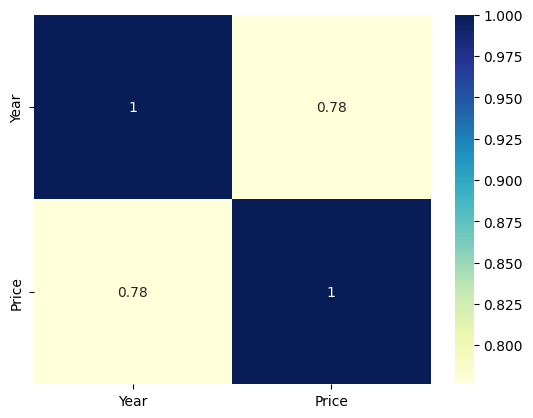

In [53]:
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

**Regression**

x=independent variable
y=dependent variable

In [54]:
x=data.drop(['Price'],axis=1)

In [55]:
y=data['Price']

In [56]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [57]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [61]:
predictions=model.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE=',mean_squared_error(y_test,predictions))
print('R squared value=',r2_score(y_test,predictions))

MSE= 4326906256.829671
R squared value= 0.36759313425902185


Prediction

In [63]:
year_2022 = np.array([2022])  # Create a NumPy array with the year 2022
x_2022 = year_2022.reshape(-1, 1)  # Reshape the array to match the model's input shape


In [64]:
predicted_price = model.predict(x_2022)
print("The predicted price of a second-hand Grand i10 in 2022 is:", predicted_price[0])

The predicted price of a second-hand Grand i10 in 2022 is: 743601.6159450412


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


To compare the performance of Lasso regression and linear regression models, we can use cross-validation and evaluate their respective mean squared error (MSE).

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [66]:
X = data['Year'].values.reshape(-1, 1)
y = data['Price'].values

In [67]:
linear_model= LinearRegression()

In [68]:
lasso_model=Lasso()

In [69]:
linear_scores = -cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
linear_mse = np.mean(linear_scores)

In [70]:
lasso_scores = -cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_mse = np.mean(lasso_scores)

In [71]:
print("Linear Regression MSE:", linear_mse)
print("Lasso Regression MSE:", lasso_mse)

Linear Regression MSE: 3564922131.7258463
Lasso Regression MSE: 3564923464.123913


both models are not satisfying.